# Prepare exercises

In [1]:
# Ignoring warning messages from python
import warnings
warnings.filterwarnings('ignore')

# General use imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modules and data
import requests
import acquire
from vega_datasets import data
from datetime import datetime

## *I. Working to create a prepare file*

### *Getting to know the data*

In [2]:
# Acquiring the necessary file

sales = acquire.get_local_sales()
sales.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
# General info

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


In [4]:
sales.shape

(913000, 14)

In [5]:
a = sales.columns.tolist()
print(a, end='')

['item_id', 'sale_amount', 'sale_date', 'sale_id', 'store_id', 'item_brand', 'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address', 'store_city', 'store_state', 'store_zipcode']

### *1. Convert date column to datetime format*

In [6]:
# Displaying the content of sale_date column as well as length and data type

sales.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [9]:
# Setting sale_date to a datetime format
sales.sale_date = pd.to_datetime(sales.sale_date)

# Sort rows by the date and then set the index as that date
sales1 = sales.set_index('sale_date').sort_index()


In [10]:
sales1.index.dtype

datetime64[ns, UTC]

In [12]:
sales1.shape[0], sales1.sale_id.nunique()

(913000, 913000)

In [13]:
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217


### *2. Plot the distribution of sale_amount and item_price*

In [14]:
# Checking the number of unique categories inside sale_amount

sales1.sale_amount.nunique()

213

<AxesSubplot:>

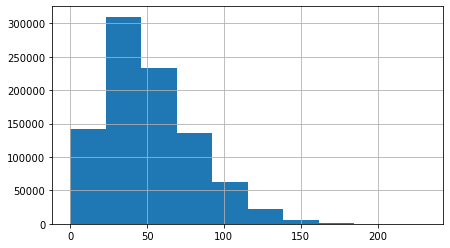

In [16]:
# Plotting sale_amount

plt.figure(figsize= (7, 4))
sales1.sale_amount.hist()

In [17]:
# Checking the number of unique categories inside item_price

sales1.item_price.nunique()

47

<AxesSubplot:>

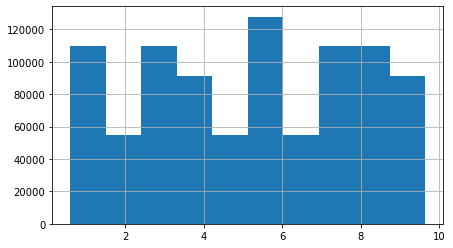

In [18]:
# Plotting sale_amount

plt.figure(figsize= (7, 4))
sales1.item_price.hist()

### *3. Set the index to be the datetime variable*

>**Already done in previous part**

### *4. Add a 'month' and 'day of week' column to your dataframe*

**The data is in GMT and I will convert it to Central**

In [22]:
sales1.tz_convert("US/Central")
sales1.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221


In [23]:
sales1['month']  = sales1.index.strftime('%m-%b')
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan


In [25]:
sales1['weekday'] = sales1.index.strftime('%w-%a')
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,2-Tue


### *5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price*

### *6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results*

****

## *II. Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following*

### *1. Convert date column to datetime format*

### *2. Plot the distribution of each of your variables*

### *3. Set the index to be the datetime variable*

### *4. Add a month and a year column to your dataframe*

### *5. Fill any missing values*

### *6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results*